# Trabalho 3 - Reconstrução da posição 3D durante o movimento de um robô móvel

Grupo: Arthur Lorencini Bergamaschi e João Pedro Bimbato Araujo

#### Libs

In [1]:
import numpy as np
import json
import cv2
from cv2 import aruco
import matplotlib.pyplot as plt
import sys

#### Funções

In [2]:
def camera_parameters(file):
    camera_data = json.load(open(file))
    K = np.array(camera_data['intrinsic']['doubles']).reshape(3, 3)
    res = [camera_data['resolution']['width'],
           camera_data['resolution']['height']]
    tf = np.array(camera_data['extrinsic']['tf']['doubles']).reshape(4, 4)
    R = tf[:3, :3]
    T = tf[:3, 3].reshape(3, 1)
    dis = np.array(camera_data['distortion']['doubles'])
    return K, R, T, res, dis

def aruco_center(corners):
    c = corners[0][0]
    return c[:, 0].mean(), c[:, 1].mean()

def detect_aruco_video(file_name): 
    aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
    parameters =  aruco.DetectorParameters_create()
    vid = cv2.VideoCapture(file_name)
    center_coordinates = []
    while True:
        _, img = vid.read()
        if img is None:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
        if ids is not None:
            for i in range(0,len(ids)):
                if(ids[i]==0):
                    center_coordinates.append(aruco_center(corners))
    return center_coordinates

def generate_projection_matrix(Rot, Trans):
    return np.vstack((np.hstack((Rot.T, -Rot.T @ Trans)), [0, 0, 0, 1]))

In [3]:
cameras_aruco_center_coordinates = []
for i in range(0,3):
    cameras_aruco_center_coordinates.append(detect_aruco_video('camera-0'+ str(i) +'.mp4'))

#### Matriz de projeção geral

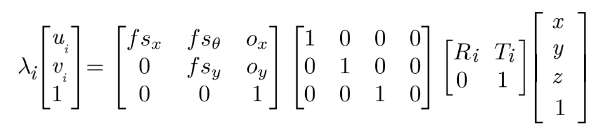

In [6]:
identity_matrix = np.eye(3,4)

general_projection_matrices = []

for i in range(0,3):
    K, R, T, res, dis = camera_parameters(str(i) + '.json')
    projection_matrix = generate_projection_matrix(R, T)
    general_projection_matrices.append(K @ (identity_matrix @ projection_matrix))